<a href="https://colab.research.google.com/github/JavohirJalilov/AI-Matplotlib/blob/master/pandas/car_number_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/JavohirJalilov/OpenCV/raw/master/CARS/car_img.zip

--2021-06-07 11:05:26--  https://github.com/JavohirJalilov/OpenCV/raw/master/CARS/car_img.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JavohirJalilov/OpenCV/master/CARS/car_img.zip [following]
--2021-06-07 11:05:26--  https://raw.githubusercontent.com/JavohirJalilov/OpenCV/master/CARS/car_img.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1041643 (1017K) [application/zip]
Saving to: ‘car_img.zip’

car_img.zip         100%[===================>]   1017K  --.-KB/s    in 0.06s   

2021-06-07 11:05:26 (16.8 MB/s) - ‘car_img.zip’ saved [1041643/1041643]



In [ ]:
!rm -r car_img

In [ ]:
!unzip car_img.zip

Archive:  car_img.zip
   creating: car_img/
  inflating: car_img/img6.jpeg       
  inflating: car_img/img2.jpeg       
  inflating: car_img/img1.jpeg       
  inflating: car_img/img3.jpeg       
  inflating: car_img/img4.jpeg       
  inflating: car_img/img5.jpeg       
  inflating: car_img/img7.jpeg       
  inflating: car_img/img30.jpeg      
  inflating: car_img/img10.jpeg      
  inflating: car_img/img8.jpeg       
  inflating: car_img/img27.jpeg      
  inflating: car_img/img9.jpeg       
  inflating: car_img/img12.jpeg      
  inflating: car_img/img11.jpeg      
  inflating: car_img/img15.jpeg      
  inflating: car_img/img29.jpeg      
  inflating: car_img/img14.jpeg      
  inflating: car_img/img28.jpeg      
  inflating: car_img/img13.jpeg      
  inflating: car_img/img17.jpeg      
  inflating: car_img/img16.jpeg      
  inflating: car_img/img21.jpeg      
  inflating: car_img/img19.jpeg      
  inflating: car_img/img18.jpeg      
  inflating: car_img/img20.jpeg      
  infl

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2  
import json
import pathlib


plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

In [ ]:
def show(img,s=8):
  plt.figure(figsize=(s,s))
  plt.imshow(img,cmap='gray')
  plt.show()

In [ ]:
def kernal(x,y):
  k = np.ones((x,y),dtype=np.uint8)
  return k

In [ ]:
def get_img(name):

  img = cv2.imread(name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  HSV_img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
  return img,HSV_img

In [ ]:
def max_area_idx(contours):
  area_list = []
  for i in range(len(contours)):
    area_list.append(cv2.contourArea(contours[i]))
  area_list = np.array(area_list)
  mx_idx = area_list.argmax()
  return mx_idx

In [ ]:
path = pathlib.Path('car_img').glob('*.jpeg')
i = 0
plt.figure(figsize=(20,9),dpi=500)
for file_path in path:
  i += 1
  filename = str(file_path.stem)
  img,HSV_img = get_img(str(file_path))


  thresh = img.copy()
  mask = cv2.Canny(thresh,550,740)
  mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernal(8,8))

  contours,_ =cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  mx_idx = max_area_idx(contours)

  drawing_img = img.copy()
  x,y,w,h = cv2.boundingRect(contours[mx_idx])
  drawing_img = cv2.rectangle(drawing_img,(x,y),(x+w,y+h),(255,0,0),4)

  plt.subplot(5,6,i)
  plt.imshow(drawing_img)
plt.show()

In [ ]:
img,HSV_img = get_img('car_img/img6.jpeg') 

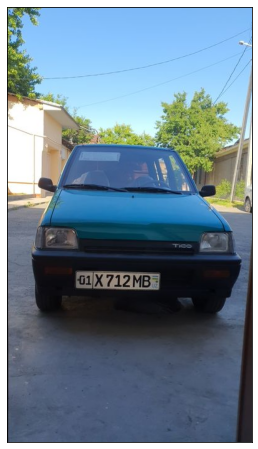

In [ ]:
show(img)

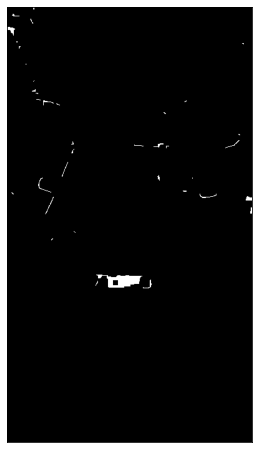

In [ ]:
# H = 55//2
# S = int(3*255/100)
# V = int(76*255/100)
# th = 1
# lower = np.array([H - th,0,120],dtype=np.uint8)
# upper = np.array([H + th,100,255],dtype=np.uint8)

# lower = np.array([H - th,0,140],dtype=np.uint8)
# upper = np.array([H + th,100,255],dtype=np.uint8)

# mask = cv2.inRange(HSV_img,lower,upper)
# mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernal(8,8))
thresh = img.copy()
mask = cv2.Canny(thresh,520,710)
mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernal(8,8))
show(mask)

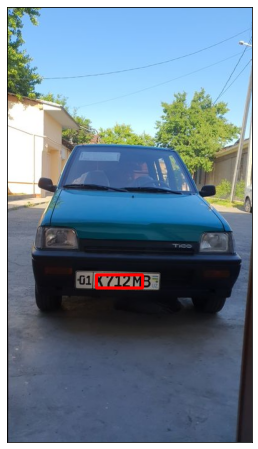

In [ ]:
drawing_img = img.copy()

contours,_ =cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
mx_idx = max_area_idx(contours)

drawing_img = img.copy()
x,y,w,h = cv2.boundingRect(contours[mx_idx])
drawing_img = cv2.rectangle(drawing_img,(x,y),(x+w,y+h),(255,0,0),3)


show(drawing_img)

In [ ]:
path = pathlib.Path('car_img').glob('*.jpeg')
i = 0
plt.figure(figsize=(15,9),dpi=150)
for file_path in path:
  i += 1
  filename = str(file_path.stem)
  img,HSV_img = get_img(str(file_path))

  if filename == 'img1':
    lower = np.array([0,0,200],dtype=np.uint8)
    upper = np.array([100,30,255],dtype=np.uint8)

  elif filename == 'img2':
    lower = np.array([120,0,120],dtype=np.uint8)
    upper = np.array([250,7,255],dtype=np.uint8)

  elif filename == 'img3':
    lower = np.array([0,0,200],dtype=np.uint8)
    upper = np.array([140,30,255],dtype=np.uint8)

  elif filename == 'img4':
    lower = np.array([5,10,200],dtype=np.uint8)
    upper = np.array([100,60,255],dtype=np.uint8)

  elif filename == 'img5':
    lower = np.array([0,0,220],dtype=np.uint8)
    upper = np.array([150,40,255],dtype=np.uint8)

  elif filename == 'img6':
    lower = np.array([10,0,120],dtype=np.uint8)
    upper = np.array([60,60,170],dtype=np.uint8)

  mask = cv2.inRange(HSV_img,lower,upper)
  mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernal(8,8))
  contours,_ =cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  mx_idx = max_area_idx(contours)

  drawing_img = img.copy()
  x,y,w,h = cv2.boundingRect(contours[mx_idx])
  drawing_img = cv2.rectangle(drawing_img,(x,y),(x+w,y+h),(255,0,0),3)

  plt.subplot(2,3,i)
  plt.imshow(drawing_img)
plt.show()

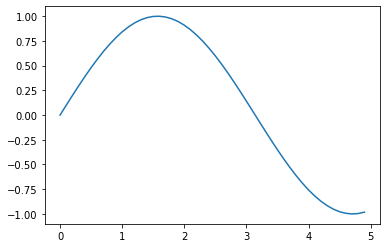

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,20)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
